In [13]:
import sentencepiece

from ConST.prepare_data.data_utils import load_df_from_tsv

In [8]:
df = load_df_from_tsv('/mnt/data/siqiouyang/datasets/must-c-v1.0/dev_st_de.tsv')

In [10]:
sorted_src_text = sorted(df['src_text'], key=lambda x: len(x.split(' ')))

In [2]:
spm = sentencepiece.SentencePieceProcaessor()
spm.Load('/mnt/data/siqiouyang/datasets/must-c-v1.0/spm_unigram10000_st_de.model')

True

In [39]:
spm.EncodeAsPieces("Practice makes perfect.")

['▁Pra', 'c', 'tic', 'e', '▁makes', '▁perfect', '.']

In [41]:
spm.EncodeAsPieces('World is boundless.')

['▁World', '▁is', '▁bo', 'und', 'less', '.']

# ST per hours of DATA


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['xtick.minor.size'] = 0
plt.rcParams['xtick.minor.width'] = 0

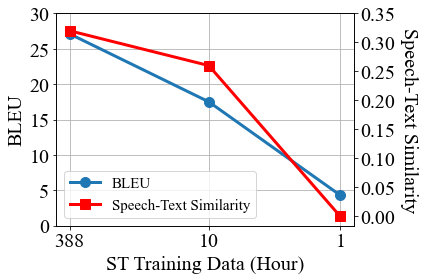

<Figure size 600x500 with 0 Axes>

In [32]:
fig, ax1 = plt.subplots()
plt.figure(dpi=100, figsize=(6, 5))
# ax1.set_xscale('log')
ax1.plot([1, 200, 388],[27.1, 17.5, 4.3], '-o', linewidth=3, markersize=10, label='BLEU')
ax1.set_xticks([1, 200, 388], ['388', '10', '1'], fontsize=20)
ax1.set_yticks([0, 5, 10, 15, 20, 25, 30], ['0', '5', '10', '15', '20', '25', '30'], fontsize=20)
ax1.set_ylabel('BLEU', fontsize=20)
ax1.set_xlabel('ST Training Data (Hour)', fontsize=20)
ax1.grid()

ax2 = ax1.twinx()
ax2.plot([1, 200, 388], [0.32, 0.26, 0], 'r-s', linewidth=3, markersize=10, label='Speech-Text Similarity')
ax2.set_yticks([0, 0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35], ['0.00', '0.05', '0.10', '0.15', '0.20', '0.25', '0.30', '0.35'], fontsize=20)
ax2.set_ylabel('Speech-Text Similarity', fontsize=20, rotation=270, labelpad=22)

lines = ax1.get_lines() + ax2.get_lines()
ax1.legend(lines, [line.get_label() for line in lines], loc='lower left', fontsize=15)

fig.tight_layout()
fig.savefig('figures/bleu_data.pdf')

# Statistics

In [27]:
df = load_df_from_tsv('/mnt/data/siqiouyang/datasets/must-c-v1.0/train_ls960_asr.tsv')
df['n_frames'].sum() / 16000 / 3600, len(df)

(961.0543984027777, 281241)